# Lab 11 – Tensorflow / Keras

- Name: Jimmy Pronchick
- Class: CSCI 349 - Intro to Data Mining  
- Semester: Spring 2023
- Instructor: Brian King  

**Exercise 1 - Interview questions about deep learning and keras**

**1)** What is an artificial neural network (ANN)?

Simulates how neurons pass information in the brain. 

**2)** What is deep learning? How does it relate to an ANN?

Deep learning is based on artificial neural networks - Machine learning generally requires structured data inputs whereas deep learning can process greater volumes of unstructured data inputs, allowing it to solve more complex issues. Also, while machine learning still requires some human intervention, deep learning models require minimal to zero human interference.

**3)** Name a couple of examples where deep learning has made a tremendous impact.

In medical imaging, deep learning has been used to identify issues 

**4)** Briefly, what is the feedforward algorithm with a neural net?

Every instance of the dataset is fed through the algorithm for a set number of epochs, error is computed at the end of the epoch and then weights are updated for next epoch through backpropagation.

 **5)** In the context of machine learning, what is a loss function?

A measurement of the error
difference between the activated output and the target output. Common function representations of this are the binary cross entropy function for classification problems and mean squared error for regression.

**6)** What is gradient descent? And how is the loss function a critical part of gradient descent?

Gradient descent is a method of minimizing the loss function for a model. It involves taking partial derivatives of the loss function to inform how the weights and parameters of the model should be updated to reach the local minimum of the loss function.

**7)** Training a neural net involves the backpropagation algorithm. In a few sentences, describe what this algorithm does.

Backpropagation fine tunes the weights of a neural network model using the loss of the model's previous epoch.

**8)** What is the difference between batch gradient descent and stochastic gradient descent?

Batch Gradient Descent involves calculations over the full training set at each step as a result of which it is very slow on very large training data.

Stochastic GD picks up a random instance of training data at each step and then computes the gradient, making it much faster as there is much fewer data to manipulate at a single time.

**9)** In the context of neural network training, explain the terms epoch and batch.

Epochs are the number of times the instances of data are fed through the algorithm. Batch size is the portion of the full dataset D that is fed through the data.

**10)** In the context of machine learning, what is a hyperparameter? 

A hyperparameter is an attribute of model that can be adjusted to affect the performance of the model.

**11)** In the context of neural nets training, what are examples of hyperparameters that can affect model 
performance?

Batch size, number of epochs, the activation function used, learning rate, dropout percent.

**12)** What is an activation function?

takes a weighted sum and generates an output for a given neuron

**13)** Most agree that the most popular activation functions are sigmoid, hyperbolic tangent (tanh), softmax, and ReLu (rectified linear unit). Compare and contrast each, using whatever resources you want. Again, 1-2 sentences for each Is sufficient.

https://towardsdatascience.com/comparison-of-activation-functions-for-deep-neural-networks-706ac4284c8a

Sigmoid functions are highly sensitive to small values and do not experience vanishing activation. Tanh is similar to sigmoid but defined between -1 and 1, instead of neg/pos infinity. Tanh has a steeper derivative than sigmoid, allowing for faster learning, steeper grad descent. ReLu runs faster than the previous 2 but may have poor accuracy on small sets, because negative nodes are zeroed out. Softmax is agreed to be effective in the output layer. It allows determining the probability that the input belongs to a particular class by producing values in the range 0-1. So it performs a probabilistic interpretation.

**14)** Why is ReLu so popular for large, deep learning networks?

ReLu is especially computationally efficient because not every neuron in the network is activated, inputs less than zero will be set to zero, meaning the neurons that recieve them are not activated.

**15)** Why is softmax most appropriate for the output layer, especially for classification problems?

Softmax provides a confidence/probability figure for each class on each instance. 

**16)** What does ReLu sometimes suffer from, and how does a Leaky ReLu activation address it?

ReLu sometimes suffers from 'dying ReLu' where many inputs happen to be negative and are thus zeroed out, and you ending losing too many neurons and prediction power. Leaky ReLu multiplies inputs under zero by a small (often .01) negative slope, so they are minimized but not zeroed out. In this case the neurons that recieve these inputs are still activated, unlike when they receive 0s every time.

**17)** What is Tensorflow? Who created it?

Tensorflow was created by Google researches at GoogleBrain and released as open source software for machine learing and more specifically deep learning.

**18)** What are tensors?

Tensors a multidimensional arrays with a **uniform** dtype. So the numeric part of a pd Dataframe.

**19)** What is keras? Who created it?

François Chollet created keras, an API for using tensor flow to create deep learning models.

**20)** Explain the relationship between keras and tensorflow. How are they similar? Different?

TensorFlow is an open-sourced end-to-end platform, a library for multiple machine learning tasks, while Keras is a high-level neural network library that runs on top of TensorFlow. Both provide high-level APIs used for easily building and training models, but Keras is more user-friendly because it's built-in Python

**21)** Describe at a very top level what the Functional API is

The functional API is one way to create an instance of a keras model, it is less straightforward than sequential but can work for more complex datasets.

**22)** What is the Sequential class, and how does it compare / contrast to the Functional API?

https://www.analyticsvidhya.com/blog/2021/07/understanding-sequential-vs-functional-api-in-keras/
https://hanifi.medium.com/sequential-api-vs-functional-api-model-in-keras-266823d7cd5e

The consensus seems to be that functional is a more flexible model building tool as it allows for multiple inputs and outputs and branching of layers. Sequential is more straightforward than functional, has been called the simplest method for buidling a model.

**23)** What is a layer? How is a layer added to a model?

A layer is a collection of weights, which is added to model by multiplying the current nodes by those weights.

**24)** What is a Dense layer?

A dense layer is a hidden layer of a machine learning model that uses an activation function to modify the inputs.

**25)** What does the compile method do for a model, and what two parameters are required to compile every 
model?

The compile method sets the initial weights for a model, the two required parameters are loss function 'loss' and 'optimizer'.

**Exercise	2 – The	return	of	iris**

**1)** [P] Copy over your code from the previous lab that read in and pre-processed the iris dataset from seaborn. 
You should have a pandas dataframe that contains four numeric variables and one categorical variable 
representing the target class. You should have one dataframe X and a dataframe y representing the target 
class. Do not split your data into training and testing data yet.
NORMALLY, I would always expect some EDA tasks to be performed to understand the distributions of your 
data (i.e. the center, shape, spread of your variables, etc). However, you did a lot of that in the previous lab. 
Generally, these variables have very similar distributions, with centers that are near each other. Thus, 
technically, you really don't need to standardize your variables. However, for most models we've learned 
about, it's a good idea. So, if you did not standardize, go ahead and do that to your X dataframe now using a zscore standardization. (All variables are numeric, so this is quite straightforward.)

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, KFold 
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Activation

In [3]:
print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


In [4]:
df_iris = sns.load_dataset('iris')
df_iris.species = pd.Categorical(df_iris.species)

In [5]:
X=pd.DataFrame(zscore(df_iris.iloc[:,:4]),index=df_iris.index)
y=df_iris.iloc[:,-1:]

**2)** [P] Shuffle your data in your data frames. This will be important for later exercises. Read about the 
shuffle() function in sklearn.utils. Import it, and use it to shuffle your X and y data frames. Use random_state=0. Remember –it returns the shuffled data! So, be sure to reassign Xand y

In [6]:
#saving unshuffled data, dont rerun this cell
X_raw = X
y_raw= y

In [7]:
X, y =shuffle(X,y,random_state=0)
X.head(5)

,sepal_length,sepal_width,petal_length,petal_width
114,-0.052506,-0.592373,0.762758,1.580464
62,0.189830,-1.973554,0.137547,-0.262387
33,-0.416010,2.630382,-1.340227,-1.315444
107,1.765012,-0.362176,1.444807,0.790671
7,-1.021849,0.788808,-1.283389,-1.315444


**3)** [P] Use train_test_split to split your data, but this time, let's use an even smaller split, using a 50/50
split, initializing with a random state of 0. (Why? This is a relatively simple dataset. Let's make the problem a 
bit more challenging by introducing a smaller training data size.)
Completing this will result in X_train, X_test, y_train and y_test data frames, both with 75 
instances.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.5,random_state=0)
X_train

,sepal_length,sepal_width,petal_length,petal_width
107,1.765012,-0.362176,1.444807,0.790671
47,-1.506521,0.328414,-1.340227,-1.315444
129,1.643844,-0.131979,1.160620,0.527406
40,-1.021849,1.019004,-1.397064,-1.183812
48,-0.658345,1.479398,-1.283389,-1.315444
...,...,...,...,...
71,0.310998,-0.592373,0.137547,0.132510
143,1.159173,0.328414,1.217458,1.448832
125,1.643844,0.328414,1.274295,0.790671
65,1.038005,0.098217,0.364896,0.264142


**4)** [M] How many inputs will your network need to have?

4 inputs

**5)** [M] Consider the outputs required for a neural network. Remember that the iris dataset is a multi-class
dataset. It has to predict three different, categorical values. How do you represent a multi-class target variable 
in a model like a neural net? For the iris data, what does the final layer of your neural net structure need to 
look like?

The output layer needs to be a 3-tuple made up of three probabality figures, one for each possible classification. 

**6)** [P] Write the code to convert the iris target variables (i.e. y_train and y_test) to a set of binarized
variables derived from the target class variable (why? Hopefully you figured out why based on your previous 
answer!)
With iris, this means that the "species" variable should be converted to a data frame (or numpy array) 
of three variables, one representing each species. (HINT: as usual, there are many ways to do this. I like pandas 
get_dummies() or scikit-learn's OneHotEncoder.) 

In [9]:
y_train = pd.DataFrame(pd.get_dummies(y_train),index=y_train.index)
y_test = pd.DataFrame(pd.get_dummies(y_test),index=y_test.index)

**7)** [P] Create your input node using Input. Usually, these are simply called inputs. When you create your 
model, you will need a distinct reference to the input later, so clearly name this. Remember how many inputs 
your network will have. Specify this here using the shape= parameter.


In [10]:
inputs=Input(
    shape=(4,),
    name="iris_input",
)

**8)** [P] Add the hidden layer(s), and specify the input as you move along that each layer should receive. We will 
keep it simple: we will just have one hidden layer, which is a Dense object. Specify the number of units in the 
layer (e.g. 9-12 is a good start for these simple data.) Specify an activation function of your choosing. Most 
basic nets use a 'sigmoid' or 'tanh' activation, though deep learning emphasizes 'relu'. (Be sure you 
understand why. It's explained in the second video on neural nets posted!) Any of the above activations are
fine.

In [11]:
layer= Dense(12, activation='sigmoid')
layer=layer(inputs)

**9)** [P] Add one more Dense layer representing the output layer. Be sure to specify the correct number of 
outputs. Use a 'softmax' activation here. Be sure to connect the previous layer.

In [12]:
outputs = Dense(3,activation='softmax')(layer)

**10)** [P] Create an instance of Model. Specify the inputs, the outputs, and name the model 
"simple_iris_model". Then, report a summary of your model using the summary() function. 

In [13]:
model = Model(inputs=inputs, outputs=outputs, name="simple_iris_model")
Model.summary(model)

Model: "simple_iris_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 iris_input (InputLayer)     [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 3)                 39        
                                                                 
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


**11)** [P] OK. Now compile your model. Look at the documentation for the compile() method.

In [14]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.SGD(learning_rate=.2,momentum=0.25),
    metrics=["accuracy"],
)

**12)** [P] OK, your structure is set. Now you need to train the model. Look at the documentation for the fit()
method. Use fit to train your model with X_train and your binarized y_train data. There are many 
additional parameters available that basically control how you perform weight updates. This is where, 
depending on your data size and your selection of parameters, you could be waiting a while. This is a SIMPLE 
dataset, and should take no more than a 5-10 seconds to get good results. 

In [15]:
history=model.fit(x=X_train,y=y_train,epochs=100,batch_size=1,verbose = 1,validation_data=(X_test,y_test))

Epoch 1/100
75/75 [==============================] - 3s 15ms/step - loss: 0.6260 - accuracy: 0.7200 - val_loss: 0.4447 - val_accuracy: 0.7600
Epoch 2/100
75/75 [==============================] - 0s 6ms/step - loss: 0.2888 - accuracy: 0.8800 - val_loss: 0.5720 - val_accuracy: 0.6933
Epoch 3/100
75/75 [==============================] - 1s 7ms/step - loss: 0.2135 - accuracy: 0.9200 - val_loss: 0.3064 - val_accuracy: 0.8267
Epoch 4/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1401 - accuracy: 0.9733 - val_loss: 0.2473 - val_accuracy: 0.8800
Epoch 5/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1242 - accuracy: 0.9733 - val_loss: 0.2071 - val_accuracy: 0.9333
Epoch 6/100
75/75 [==============================] - 1s 7ms/step - loss: 0.0790 - accuracy: 0.9733 - val_loss: 0.2243 - val_accuracy: 0.9200
Epoch 7/100
75/75 [==============================] - 1s 7ms/step - loss: 0.0806 - accuracy: 0.9733 - val_loss: 0.1774 - val_accuracy: 0.9333
Epoch 8/100


**13)** [P] It's important to understand your accuracy and loss rates as your model proceeds through training. 
Visualize the loss on training and test data. Look at the code presented here:
https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/. You may adapt 
it, or make it more fancy if you choose to do so. Pay attention to the section of code that shows Training 
history visualization. If you did everything correctly, you should show two graphs, one for model loss, and one 
for model accuracy. 

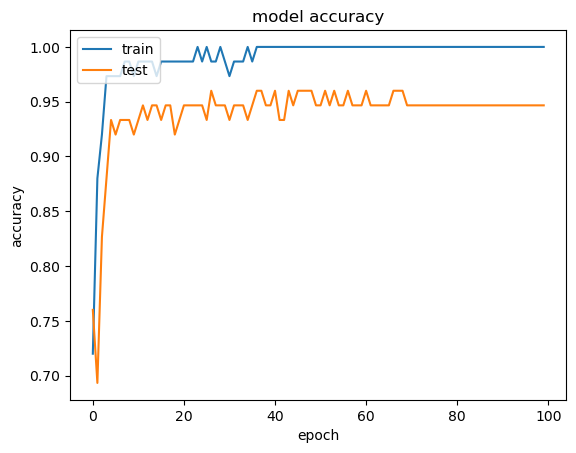

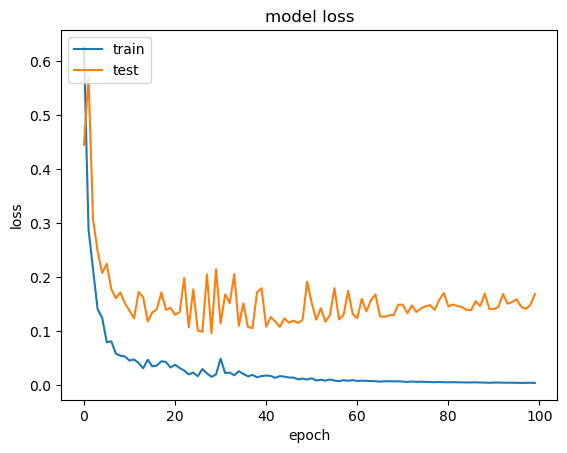

In [16]:
def generate_plots(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
generate_plots(history)

**14)** [P] – THIS STEP IS OPTIONAL! Look at the example flow of a keras project as presented in 
https://keras.io/guides/functional_api/. Notice the steps to plot the model as a graph. You can generate a nice 
visualization of the model. You don't need to do it for this step, but might be good to try out and know how to 
do for your future. 

In [17]:
#bookmarked functional api guide

**15)** ) [P] Try to change some parameters with the model. However, instead of copying and pasting each individual 
line you wrote above, follow the approach of creating the entire structure in a single notebook cell.

In [18]:
inputs = Input(shape=(4,))
layer = Dense(12, activation="sigmoid")(inputs) #relu performs much worse, maybe because this is a smaller dataset
outputs = Dense(3,activation="softmax")(layer)
model2 = Model(inputs=inputs, outputs=outputs, name="simple_iris_model_2")

**16)** [P] OK, one more time. This time, copy the same model, but use an SGD optimizer. Of course, you may have 
already chosen this by specifying the optimizer='sgd' parameter when you compiled your model. This 
time, you will instantiate your optimizer. 

Copy one of your models above. (Remember, if you keep using the same model instance, you are continually 
improving the weights, and thus not evaluating your new model properly! When you experiment with new 
models, you need to instantiate a new model, or figure out how to reset your weights to random initial 
values. For now, it's just easy enough to reinstantiate a new model.)
Now, instantiate SGD. Look at the documentation, and choose a different learning rate (lr) and a momentum 
value of some value between 0.5-0.9. Compile and fit your model. Regenerate your accuracy and loss plots. 
Compare and contrast your findings.

In [19]:
model2.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.SGD(learning_rate=.1,momentum=0.5),
    metrics=["accuracy"],
)
history2=model2.fit(x=X_train,y=y_train,epochs=100,batch_size=1,verbose = 1,validation_data=(X_test,y_test))

Epoch 1/100
75/75 [==============================] - 2s 14ms/step - loss: 0.7590 - accuracy: 0.6533 - val_loss: 0.6560 - val_accuracy: 0.6133
Epoch 2/100
75/75 [==============================] - 1s 7ms/step - loss: 0.3519 - accuracy: 0.8667 - val_loss: 0.3447 - val_accuracy: 0.8667
Epoch 3/100
75/75 [==============================] - 1s 7ms/step - loss: 0.2186 - accuracy: 0.9200 - val_loss: 0.3185 - val_accuracy: 0.8400
Epoch 4/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1708 - accuracy: 0.9733 - val_loss: 0.2644 - val_accuracy: 0.8933
Epoch 5/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1334 - accuracy: 0.9733 - val_loss: 0.2490 - val_accuracy: 0.9333
Epoch 6/100
75/75 [==============================] - 1s 7ms/step - loss: 0.1147 - accuracy: 0.9733 - val_loss: 0.2802 - val_accuracy: 0.8667
Epoch 7/100
75/75 [==============================] - 1s 7ms/step - loss: 0.0937 - accuracy: 0.9867 - val_loss: 0.1932 - val_accuracy: 0.9200
Epoch 8/100


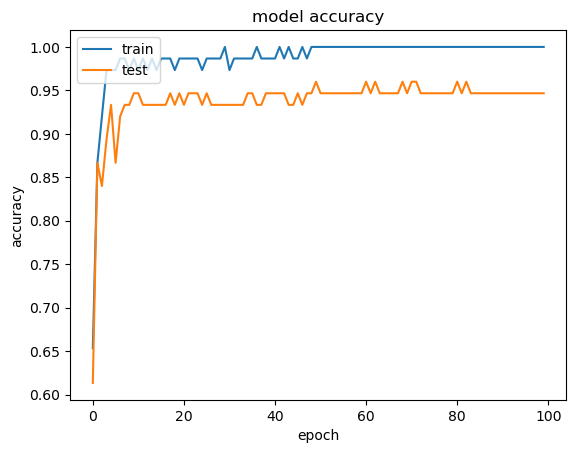

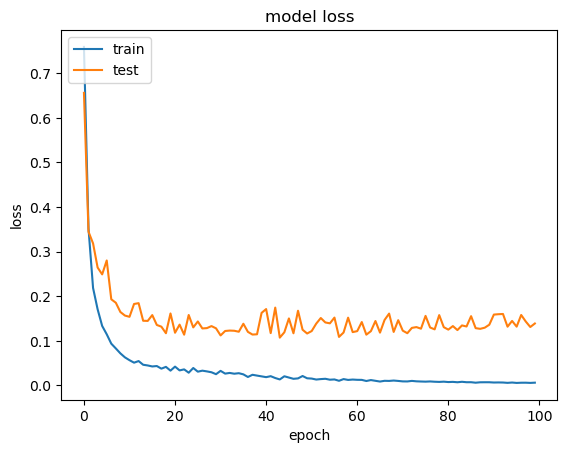

In [20]:
generate_plots(history2)

**17)** [P] Remember, this is a classification problem. Use your model to predict the classes for the test data (using the 
function predict on the model object itself) and store the results as y_pred. (NOTE: the model is part of 
the history object. So, use history.model.predict. 

In [21]:
y_pred=history2.model.predict(X_test)

3/3 [==============================] - 0s 6ms/step


**18)** [P] Notice the structure of y_pred. Remember, softmax generates probabilistic output. So, turn this into a new 
variable called y_pred_class that predicts the actual class label. (HINT: argmax is your friend!)

In [22]:

y_pred_class = pd.DataFrame(pd.get_dummies(y_pred.argmax(axis=1)))
y_pred_class=y_pred_class.rename(columns={0:'species_setosa',1:'species_versicolor',2:'species_virginica'})
y_pred_class

,species_setosa,species_versicolor,species_virginica
0,0,0,1
1,0,0,1
2,0,0,1
3,1,0,0
4,0,1,0
...,...,...,...
70,1,0,0
71,0,0,1
72,0,0,1
73,1,0,0


**19)** [P] Finally, using your code from the lab on classification, output the confusion_matrix and the 
classification_report (from scikit-learn's metric package) to print out the complete performance 
results.

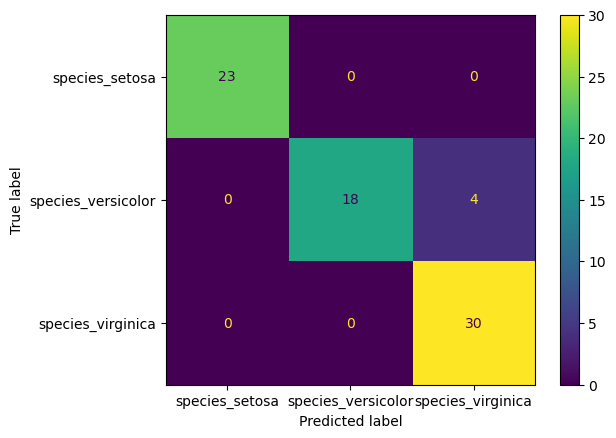

In [23]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(
    y_test.apply(lambda x:x.argmax(),axis=1),
    y_pred_class.apply(lambda x:x.argmax(),axis=1)),
                               display_labels=y_test.columns).plot()

In [24]:
print(metrics.classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.82      0.90        22
           2       0.88      1.00      0.94        30

   micro avg       0.95      0.95      0.95        75
   macro avg       0.96      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75
 samples avg       0.95      0.95      0.95        75



**Exercise 3 – Wrapping keras in the scikit-learn framework.**

**20)** [P] Import the following class into your code:
from scikeras.wrappers import KerasClassifier
Then write a function called create_keras_model(). Copy all of your code that creates the Model
instance and adds the layers into this function. 

In [25]:
from scikeras.wrappers import KerasClassifier

In [26]:
def create_keras_model():
    inputs = Input(shape=(4,))
    layer = Dense(12, activation="sigmoid")(inputs)
    outputs = Dense(3,activation="softmax")(layer)
    model = Model(inputs=inputs, outputs=outputs)
    
    model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.SGD(learning_rate=.1,momentum=0.5),
    metrics=["accuracy"],
)
    return model

**21)** [P] At this point, you now have a classifier model that behaves like any other scikit-learn classifier! Cool, right?
So, using the clf classifier above, use it just like you would any other classifier. Run the fit method on your 
classifier, just like you did in lab10. Use X_train and the one hot encoded y_train data. 
NOTE: You might be wondering how to get access to the actual learning curve, i.e. the History object. You can! 
Look at the history_ attribute of clf after fitting your data. It contains the actual data you want to plot.
Finally, use clf.predict() to generate class predictions on X_test. Store the results in y_pred. just 
like you would with scikit-learn.
y_pred = clf.predict(X_test)
Remember you'll need to convert the predictions back to a single value using argmax.


In [27]:
clf=KerasClassifier(create_keras_model(),epochs=100)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

Epoch 1/100
3/3 [==============================] - 1s 7ms/step - loss: 0.9194 - accuracy: 0.6133
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 0.8688 - accuracy: 0.8667
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 0.8165 - accuracy: 0.8133
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 0.7718 - accuracy: 0.8800
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 0.7267 - accuracy: 0.8400
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6875 - accuracy: 0.8800
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.8533
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6202 - accuracy: 0.8800
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5972 - accuracy: 0.8533
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5620 - accuracy: 0.9067
Epoch 11/100
3/3 [===========

In [30]:
y_test

,species_setosa,species_versicolor,species_virginica
118,0,0,1
101,0,0,1
127,0,0,1
28,1,0,0
86,0,1,0
...,...,...,...
23,1,0,0
139,0,0,1
121,0,0,1
37,1,0,0


**22)** [P] Use the predictions to generate a confusion matrix.Be sure to pay attention to whether the predictions 
are class labels or probabilities of each class. If they are probabilities, then you need to use the argmax()
method to get the class label.

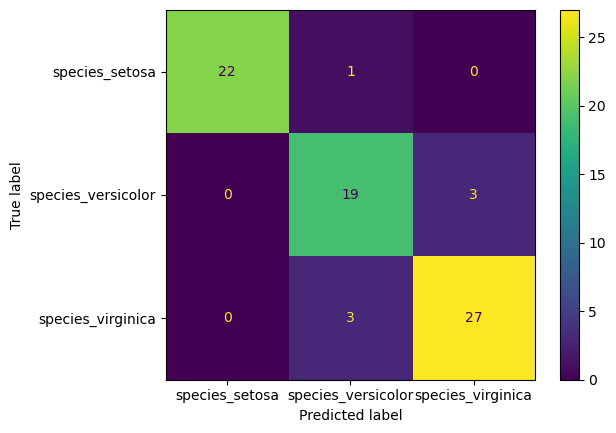

In [28]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(
    y_test.apply(lambda x:x.argmax(),axis=1),
    y_pred.argmax(axis=1)),
                               display_labels=y_test.columns).plot()

**23)** [P] Generate a performance report with the classification_report function

In [262]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.84      0.95      0.89        22
           2       0.96      0.87      0.91        30

   micro avg       0.93      0.93      0.93        75
   macro avg       0.93      0.94      0.94        75
weighted avg       0.94      0.93      0.93        75
 samples avg       0.93      0.93      0.93        75



**24)** [P] Now, harness the power of wrapping this class. Use your code from lab10 that performed a full cross 
validation. For sake of your time, you may set K to 5. Also, you will likely want to disable verbose mode for 
this, otherwise you'll have a LOT of output. AND, because deep learning models can take a while to train each 
model, it is a good idea to generate some output in your loop to show that the cross validation is progressing. 

In [269]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=5,shuffle=True,random_state=100)

In [270]:
df_results=pd.DataFrame(columns=['prediction','true_class'])
for train, test in kfold.split(X,y):
    clf=KerasClassifier(create_keras_model(),epochs=100)
    clf=clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)

Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 1.0585 - accuracy: 0.6133
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 1.0009 - accuracy: 0.6667
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9500 - accuracy: 0.9333
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9059 - accuracy: 0.7733
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8527 - accuracy: 0.7600
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8036 - accuracy: 0.9333
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7710 - accuracy: 0.7867
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7196 - accuracy: 0.9333
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6771 - accuracy: 0.9467
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6454 - accuracy: 0.9200
Epoch 11/100
3/3 [===========

**25)** [P] Generate a full confusion matrix and final classification report based on your 5-fold cross validation of the 
keras model.

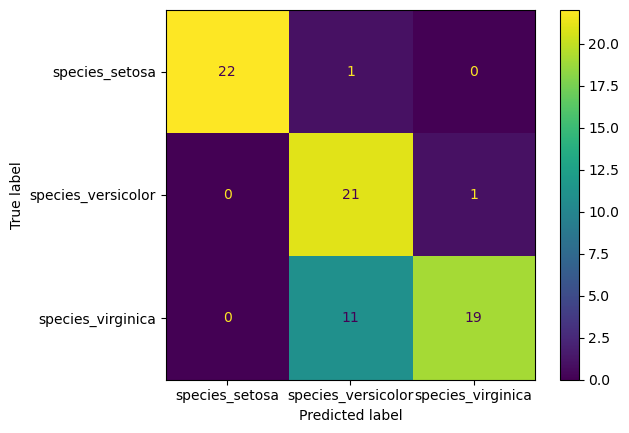

In [271]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(
    y_test.apply(lambda x:x.argmax(),axis=1),
    y_pred.argmax(axis=1)),
                               display_labels=y_test.columns).plot()

In [272]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.64      0.95      0.76        22
           2       0.95      0.63      0.76        30

   micro avg       0.83      0.83      0.83        75
   macro avg       0.86      0.85      0.83        75
weighted avg       0.87      0.83      0.83        75
 samples avg       0.83      0.83      0.83        75

